Calculated coefficients (manual): slope = 0.4145, intercept = 0.5200
Pearson correlation coefficient (numpy): r_pearson = 0.9902

Statsmodels coefficients (original data): slope = 0.4145, intercept = 0.5200
Statsmodels 95% Confidence Intervals for coefficients (original data):
                0       1
Intercept  0.2240  0.8160
data_x     0.3668  0.4623
Pearson correlation coefficient (statsmodels context): r_pearson = 0.9902


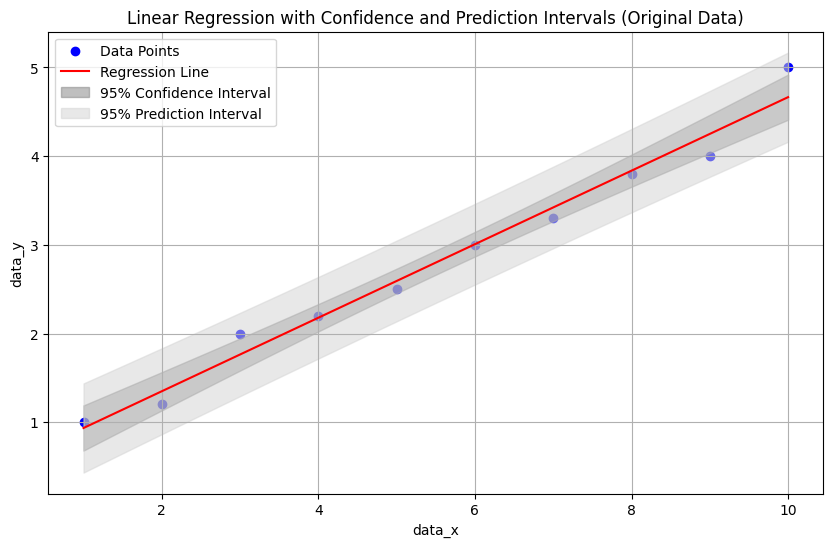


Statsmodels coefficients (noisy data): slope = 0.3592, intercept = 0.6745
Statsmodels 95% Confidence Intervals for coefficients (noisy data):
                0       1
Intercept -0.3710  1.7199
data_x     0.1907  0.5277
Pearson correlation coefficient (noisy data): r_pearson_noisy = 0.8668


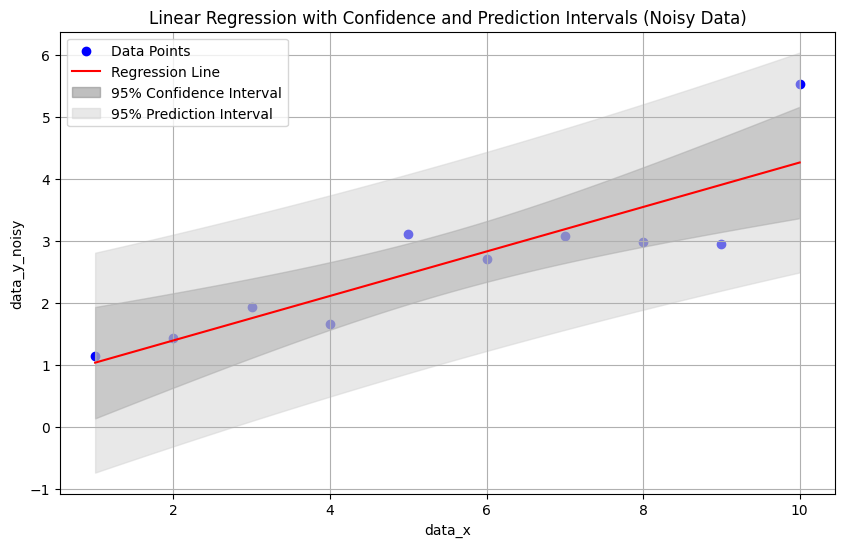

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf

# --- Original Data ---
# Define the input data points
data_x = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])
data_y = np.array([1.0, 1.2, 2.0, 2.2, 2.5, 3.0, 3.3, 3.8, 4.0, 5.0])

# Calculate linear regression coefficients using basic formulas
n_points = len(data_x)
numerator = n_points * np.sum(data_x * data_y) - np.sum(data_x) * np.sum(data_y)
denominator = n_points * np.sum(data_x**2) - (np.sum(data_x))**2
slope_manual = numerator / denominator  # slope (a)
intercept_manual = (np.sum(data_y) - slope_manual * np.sum(data_x)) / n_points  # intercept (b)

print(f'Calculated coefficients (manual): slope = {slope_manual:.4f}, intercept = {intercept_manual:.4f}')

# Calculate Pearson correlation coefficient
r_pearson_manual = np.corrcoef(data_x, data_y)[0, 1]
print(f'Pearson correlation coefficient (numpy): r_pearson = {r_pearson_manual:.4f}')

# --- Statsmodels Analysis (Original Data) ---
# Use statsmodels for more comprehensive analysis (equivalent to MATLAB's fitlm)
df_original = pd.DataFrame({'data_x': data_x, 'data_y': data_y})

# Fit the OLS (Ordinary Least Squares) model
model_original = smf.ols('data_y ~ data_x', data=df_original).fit()

# Extract coefficients and confidence intervals
intercept_sm = model_original.params['Intercept']
slope_sm = model_original.params['data_x']
ci_sm = model_original.conf_int(alpha=0.05) # 95% confidence interval for coefficients

print(f'\nStatsmodels coefficients (original data): slope = {slope_sm:.4f}, intercept = {intercept_sm:.4f}')
print(f'Statsmodels 95% Confidence Intervals for coefficients (original data):\n{ci_sm.round(4)}')

# Calculate Pearson correlation coefficient using statsmodels (equivalent to MATLAB's corrcoef on original data)
# Although np.corrcoef is already used, statsmodels also provides correlation in its results summary
# For consistency with MATLAB code flow, we'll re-calculate using numpy here as well
r_pearson_sm = np.corrcoef(data_x, data_y)[0, 1]
print(f'Pearson correlation coefficient (statsmodels context): r_pearson = {r_pearson_sm:.4f}')


# --- Plotting Function ---
def plot_regression(ax, data_x, data_y, model, title, ylabel, include_intervals=True):
    """Plots the data points, regression line, and prediction/confidence intervals."""
    ax.scatter(data_x, data_y, color='blue', label='Data Points')

    # Generate points for the regression line and intervals
    x_line = np.linspace(min(data_x), max(data_x), 100)
    x_line_df = pd.DataFrame({'data_x': x_line})
    predictions = model.get_prediction(x_line_df)
    pred_ci = predictions.summary_frame(alpha=0.05)

    # Plot the regression line
    ax.plot(x_line, pred_ci['mean'], color='red', label='Regression Line')

    if include_intervals:
        # Plot confidence intervals for the mean response
        ax.fill_between(x_line, pred_ci['mean_ci_lower'], pred_ci['mean_ci_upper'],
                        color='gray', alpha=0.5, label='95% Confidence Interval')
        # Plot prediction intervals for new observations
        ax.fill_between(x_line, pred_ci['obs_ci_lower'], pred_ci['obs_ci_upper'],
                        color='lightgray', alpha=0.5, label='95% Prediction Interval')


    ax.set_xlabel('data_x')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

# --- Plotting Original Data Analysis ---
fig, ax = plt.subplots(figsize=(10, 6))
plot_regression(ax, data_x, data_y, model_original,
                'Linear Regression with Confidence and Prediction Intervals (Original Data)',
                'data_y')
plt.show()


# --- Add Noise and Re-run Analysis ---
# Add random noise to the original dataY
noise = np.random.normal(0, 0.5, size=len(data_y)) # Standard deviation matching previous code
data_y_noisy = data_y + noise

# Use statsmodels for analysis on noisy data
df_noisy = pd.DataFrame({'data_x': data_x, 'data_y_noisy': data_y_noisy})
model_noisy = smf.ols('data_y_noisy ~ data_x', data=df_noisy).fit()

# Extract coefficients and confidence intervals for noisy data
intercept_noisy_sm = model_noisy.params['Intercept']
slope_noisy_sm = model_noisy.params['data_x']
ci_noisy_sm = model_noisy.conf_int(alpha=0.05)

print(f'\nStatsmodels coefficients (noisy data): slope = {slope_noisy_sm:.4f}, intercept = {intercept_noisy_sm:.4f}')
print(f'Statsmodels 95% Confidence Intervals for coefficients (noisy data):\n{ci_noisy_sm.round(4)}')

# Calculate Pearson correlation coefficient for noisy data
r_pearson_noisy_sm = np.corrcoef(data_x, data_y_noisy)[0, 1]
print(f'Pearson correlation coefficient (noisy data): r_pearson_noisy = {r_pearson_noisy_sm:.4f}')

# --- Plotting Noisy Data Analysis ---
fig, ax = plt.subplots(figsize=(10, 6))
plot_regression(ax, data_x, data_y_noisy, model_noisy,
                'Linear Regression with Confidence and Prediction Intervals (Noisy Data)',
                'data_y_noisy')
plt.show()